In [3]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering


In [4]:
dataset = pd.read_csv('Country-data.csv')

# Выбор важных параметров
# смертность детей, средний доход на душу населения и ВВП на душу населения, качество жизни
X = dataset[['child_mort', 'income', 'gdpp', 'life_expec']]

print(X.isnull().sum())

child_mort    0
income        0
gdpp          0
life_expec    0
dtype: int64


In [5]:
scaler = MinMaxScaler()
X_normalized = scaler.fit_transform(X) 

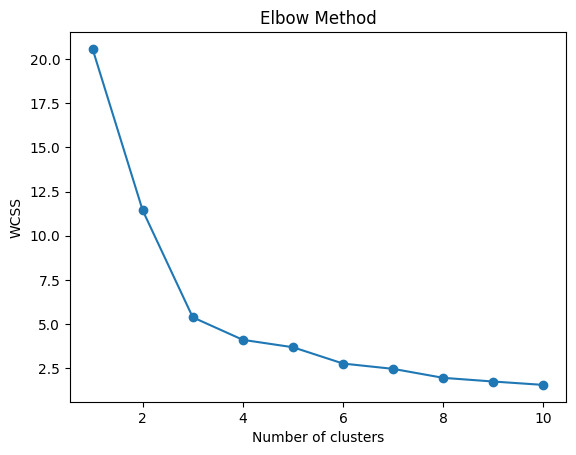

In [15]:
# Метод локтя
inertia = []
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X_normalized)
    inertia.append(kmeans.inertia_)

plt.plot(range(1, 11), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

# Разделение на кластеры
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(X_normalized)
clusters_kmeans = kmeans.predict(X_normalized)


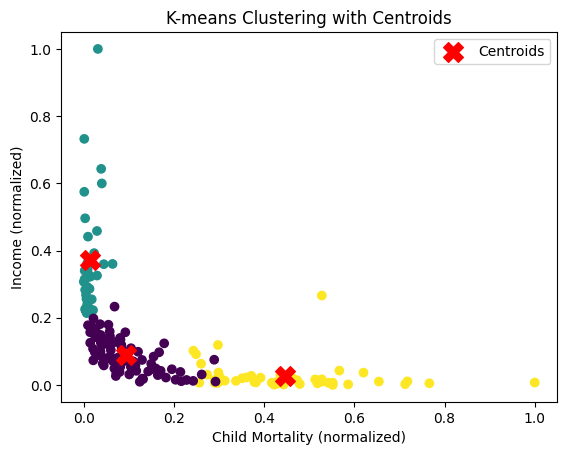

In [16]:
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=200, c='red', marker='X', label='Centroids')
plt.xlabel('Child Mortality (normalized)')
plt.ylabel('Income (normalized)')
plt.title('K-means Clustering with Centroids')
plt.legend()
plt.show()


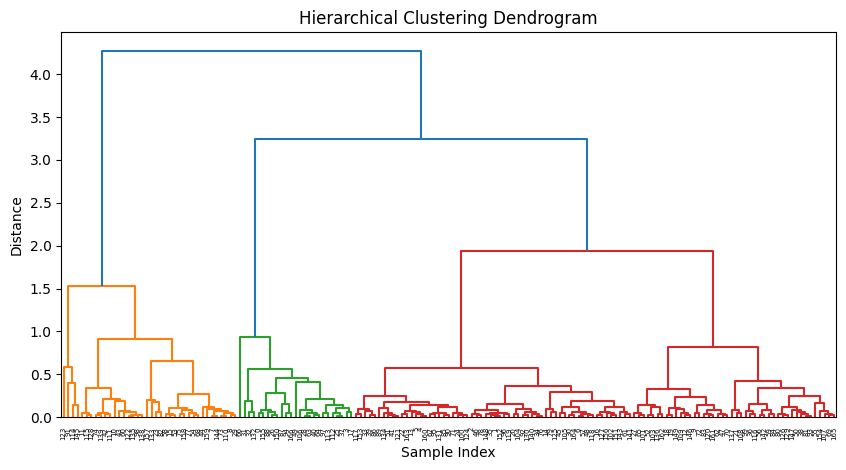

In [96]:
# Иерархическая кластеризация
# ward минимизирует дисперсию внутри кластеров при объединении
linkage_matrix = linkage(X_normalized, method='ward')

# Визуализация дендрограммы
plt.figure(figsize=(10, 5))
dendrogram(linkage_matrix)
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()


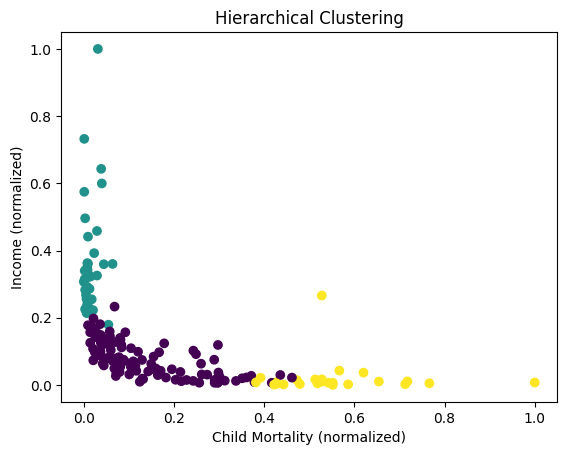

In [20]:
# Разделение на кластеры
agg_clustering = AgglomerativeClustering(n_clusters=3)
clusters_agg = agg_clustering.fit_predict(X_normalized)

# Визуализация результатов
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters_agg, cmap='viridis')
plt.xlabel('Child Mortality (normalized)')
plt.ylabel('Income (normalized)')
plt.title('Hierarchical Clustering')
plt.show()


In [21]:
# Оценка качества K-means
silhouette_kmeans = silhouette_score(X_normalized, clusters_kmeans)
print(f'Silhouette Score for K-means: {silhouette_kmeans}')

# Оценка качества иерархической кластеризации
silhouette_agg = silhouette_score(X_normalized, clusters_agg)
print(f'Silhouette Score for Hierarchical Clustering: {silhouette_agg}')

Silhouette Score for K-means: 0.5157673621273561
Silhouette Score for Hierarchical Clustering: 0.477445776787075


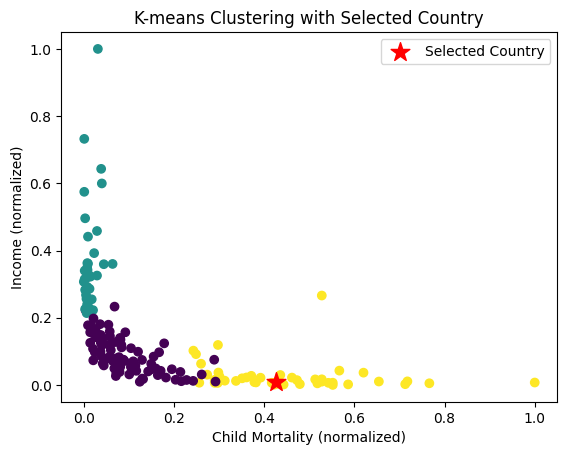

In [22]:
# Выбор одного объекта (первой страны из датасета)
selected_country = X_normalized[0]

# Визуализация выбранного объекта
plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=clusters_kmeans, cmap='viridis')
plt.scatter(selected_country[0], selected_country[1], c='red', marker='*', s=200, label='Selected Country')
plt.xlabel('Child Mortality (normalized)')
plt.ylabel('Income (normalized)')
plt.title('K-means Clustering with Selected Country')
plt.legend()
plt.show()

# 1. Что решают задачи кластеризации в машинном обучении?
    Задачи кластеризации в машинном обучении направлены на группировку схожих объектов в наборе данных без заранее известных меток классов. 
    Это позволяет выявить внутреннюю структуру данных и выделить скрытые закономерности или группы, которые могут быть полезны для дальнейшего анализа.
# 2. Расскажите принцип работы метода K-means.
    Метод K-means является одним из самых популярных алгоритмов кластеризации. Он начинается с инициализации центроидов кластеров случайным образом, а затем итеративно перераспределяет точки данных между кластерами, минимизируя среднеквадратичное расстояние между точками данных и центроидами их соответствующих кластеров. Этот процесс повторяется до тех пор, пока центроиды и распределение точек не стабилизируются.
# 3. Как можно выбрать оптимальное количество кластеров в K-means?
    Одним из способов выбрать оптимальное количество кластеров в K-means является метод локтя. Этот метод заключается в построении графика инерции (суммы квадратов расстояний от каждой точки данных до центроида ее кластера) в зависимости от числа кластеров. Оптимальное количество кластеров обычно соответствует точке на графике, где увеличение числа кластеров перестает существенно уменьшать инерцию (точка изгиба, "локоть").
# 4. Расскажите принцип работы метода иерархической кластеризации.
    Метод иерархической кластеризации строит иерархию кластеров путем последовательного объединения или разделения кластеров. Существует два основных метода иерархической кластеризации: метод объединения и метод разделения. В методе объединения начально каждый объект представляет собой отдельный кластер, а затем на каждом шаге ближайшие кластеры объединяются в один до тех пор, пока не останется один кластер. В методе разделения на каждом шаге самый большой кластер разбивается на два, пока каждый объект не станет отдельным кластером.
# 5. Для чего можно использовать дендрограмму в методе иерархической кластеризации?
    Дендрограмма - это дерево, которое представляет иерархию кластеров, построенную методом иерархической кластеризации. Дендрограмма помогает визуализировать процесс объединения или разделения кластеров и позволяет исследователю выбрать оптимальное количество кластеров, опираясь на расстояние между объединяемыми кластерами.
# 6. Какие метрики используют для оценки качества кластеризации?
    Принято выделять две группы методов оценки качества кластеризации:
    а. Внешние (англ. External) меры основаны на сравнении результата кластеризации с априори известным разделением на классы (используют дополнительные знания о кластеризуемом множестве: распределение по кластерам, количество кластеров)
    б. Внутренние (англ. Internal) меры отображают качество кластеризации только по информации в данных (опираясь только непосредственно на нее, не используя внешней информации)

    Компактность кластеров: чем ближе друг к другу находятся объекты внутри кластеров, тем лучше разделение
    Разделимость кластеров: чем дальше друг от друга находятся объекты разных кластеров, тем лучше
    Силуэт: показывает, насколько объект похож на свой кластер по сравнению с другими кластерами